# Porazdelitve in osamelci

# Distributions and outliers

Verjetnostna porazdelitev $P$ je funkcija nad naključno spremenljivko $X$, ki vsaki možni vrednosti spremenljivke priredi verjetnost - vrednost v intervalu $[0,1]$. Spremenljivka $X$ je lahko zvezna, diskretna, eno- ali več dimenzionalna. 

Vrednost $P(X)$ je za vsako možno vrednost spremenljivke $X$ (celotno definicijsko območje), vsota preko definicijskega območja pa mora biti enaka $1$.

Za vsako verjetnostno porazdelitev, ki jo bomo spoznali v nadaljevanju, navedemo:
* definicijsko območje (t.j. kakšna je spremnljivka $X$),
* obliko (formulo, ki vsaki vrednosti $X$ priredi verjetnost),
* parametre (konstante, ki določajo vrednosti in/ali obliko funkcije)


**Vodilo:** *Izbira porazdelitve za modeliranje je odvisna od narave podatkov.*

The probability distribution $P$ is a function over the random variable $X$, which assigns a probability to each possible value of the variable - a value in the interval $[0,1]$. The variable $X$ can be continuous, discrete, one- or multi- dimensional.

The value of $P(X)$ is for each possible value of the variable $X$ (the entire definition range), and the sum over the definition range must be the same as $1$.

For each probability distribution that we will learn below, we give:
* the definition area (i.e., what is the $X$);
* form (a formula that assigns a probability to each value of $X$),
* parameters (constants that determine the values ​​and / or the shape of the function)

**Guide:** *The choice of the distribution to model depends on the nature of the data.*

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np
np.random.seed(42)

## Gaussova (normalna) porazdelitev

## Gaussian (normal) distribution

Normalna (ali Gaussova) porazdelitev je porazdelitev na celotnem območju realnih števil. Je ena od najpogostejših porazdelitev, ki se uporabljao v praksi, saj ima veliko podatkov znano, zvonasto obliko. Funkcija je *simetrična* in podana z dvema parametroma, sredino in varianco.

**Tip spremenljivke:** eno- ali več dimenzionalna, zvezna.

**Definicijsko območje:** $(-\infty, +\infty)$

**Oblika:**
    $$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma ^2}}$$

**Parametri:**
* $\mu$ sredina/upanje
* $\sigma^2$ varianca

The normal (or Gaussian) distribution is the distribution over the whole range of real numbers. It is one of the most common distributions, which is used in practice, since a lot of data is bell-shaped. The function is *symmetric* and is given by two parameters, the mean and the variance.

**Variable type:** one- or multi- dimensional, continuous.

**Definition range:** $(-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma ^2}}$$

**Parameters:**
* $\mu$ middle/hope
* $\sigma^2$ varianca

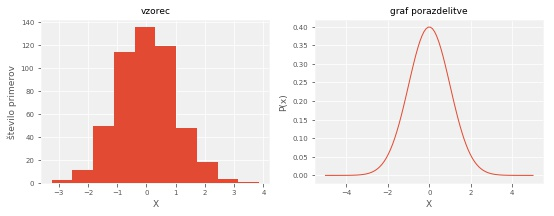

In [2]:
from scipy.stats import multivariate_normal as mvn 

# Parametri določajo obliko funkcije
mu     = 0   # sredina
sigma2 = 1   # varianca

n = 500  # velikost vzorca
sample = mvn.rvs(mu, sigma2, size=n)  # naključen vzorec n primerov

xr = np.linspace(-5, 5, 100)               # interval X 
P  = [mvn.pdf(x, mu, sigma2) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Učenje parametrov

V praksi resničnih vrednosti parametrov ne poznamo. *Parametrov se naučimo iz vzorca*. Prednosti postopka so, da nato lahko sklepamo o novih vzorcih, t.j., vsaki možni vrednosti spremenljivke priredimo verjetnost.

Imamo vzorec naključne spremenljivke $X$ velikosti $n$. 
$$ {X_1, X_2, ..., X_n} $$

Za normalno porazdelitev dobimo *oceno* za parametre na naslednji način:

$\mu = E[X_i] = \bar{X}$

$\sigma^2 = \frac{n-1}{n} E[(X_i-\bar{X})^2] = \frac{n-1}{n} var[x]$

Vrednost $\mu$ je povprečje vzorca. Vrednost $\sigma^2$ je popravljena varianca vzorca.

### Learning the parameters

In practice, we do not know the real values ​​of the parameters. *Parameters are learned from the sample*. The advantage of the process is that we can then conclude on new samples, i.e., each possible value of the variable is determined by the probability.

We have a sample of random variable $X$ of size $n$.
$$ {X_1, X_2, ..., X_n} $$

For a normal distribution, we get the *estimate* for the parameters as follows:

$\mu = E[X_i] = \bar{X}$

$\sigma^2 = \frac{n-1}{n} E[(X_i-\bar{X})^2] = \frac{n-1}{n} var[x]$

The $\mu$ value is the average of the sample. The $\sigma^2$ value is the corrected variance of the sample.

Ocenimo parametre iz vzorca:

We estimate the parameters from the sample:

In [3]:
mu_fit = np.mean(sample)
sigma2_fit = (n-1)/n * np.var(sample)

mu_fit, sigma2_fit

(0.0068379945886475751, 0.95901035514809119)

Ocenjeni vrednosti parametrov sta podobni resničnim vrednostim ($\mu = 0$ , $\sigma^2 = 1$).

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo:

The estimated values ​​of the parameters are similar to the real values ​​($\mu = 0$, $\sigma^2 = 1$).

In one picture we compare the distribution with the learned parameters with the correct distribution:

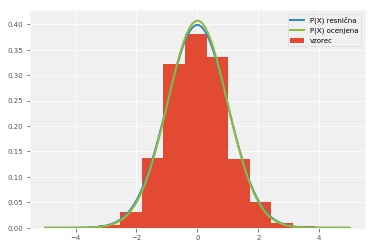

In [4]:
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in xr]

plt.figure()
plt.hist(sample,    label="vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)  
plt.legend();

##### Vprašanje 3-1-1

Preveri, kako se natančnost ocene parametrov spreminja z velikostjo vzorca $n$.

##### Question 3-1-1

Check how the accuracy of the parameter estimation changes with the size $n$ of the sample.

[Odgovor](203-1.ipynb#Odgovor-3-1-1)

[Answer](203-1.ipynb#Answer-3-1-1)

## Studentova porazdelitev

Studentova porazdelitev (ali t-porazdelitev) je porazdelitev na celotnem območju realnih števil. Njena oblika je simetrična in podobna normalni porazdelitvi. Je manj občutljiva na *osamelce v majhnih vzorcih*.


**Tip spremenljivke:** eno-dimenzionalna, zvezna.

**Definicijsko območje:** $x \in (-\infty, +\infty)$

**Oblika:**
    $$ P(x) = \frac{\Gamma[(\nu + 1) / 2]}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{x^2}{\nu} \right)^{-(\nu + 1) / 2}$$

**Parametri:**
* $\nu$ število prostostnih stopenj

## Student's distribution

Student's distribution (or t-distribution) is the distribution over the entire range of real numbers. Its shape is symmetrical and similar to normal distribution. It is less sensitive to *outliers in small samples*.


**Variable type:** one-dimensional, continuous.

**Definition range:** $x \in (-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{\Gamma[(\nu + 1) / 2]}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{x^2}{\nu} \right)^{-(\nu + 1) / 2}$$

**Parameters:**
* $\nu$ number of degrees of freedom

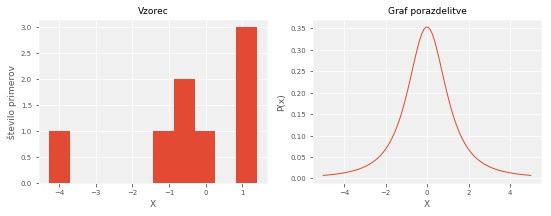

In [5]:
from scipy.stats import t as student 

# Parametri določajo obliko funkcije
nu = 2 # prostostne stopnje

n = 8  # velikost vzorca
sample = student.rvs(nu, size=n)  # naključen vzorec n primerov spremenljivke

xr = np.linspace(-5, 5, 100)  # interval X 
P  = [student.pdf(x, nu) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Učenje parametrov iz vzorca

Večina porazdelitve v knjižnici ```scipy``` vsebuje funkcijo ```fit```, ki izračuna najverjetnejše vrednosti parametrov porazdelitve glede na vzorec.

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo

### Learning the parameters from the sample

Most distributions in the `scipy` library contain a `fit` function, which calculates the most likely values of the distribution parameters relative to the sample.

In one picture we compare the distribution with the learned parameters with the correct distribution

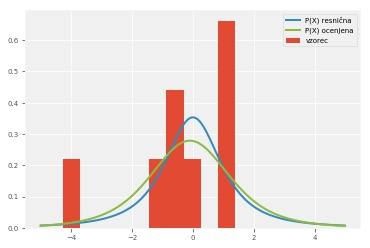

In [6]:
pars = student.fit(sample)
P_fit = [student.pdf(x, *pars) for x in xr ]

plt.figure()
plt.hist(sample,    label="vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.legend();

##### Vprašanje 3-1-2

Generiraj vzorec z  manjhnim številom (do 20) vzorcev iz normalne porazdelitve. Primerjaj ocene porazdelitve s pomočjo normalne in Studentove porazdelitve. Katera porazdelitev bolje oceni resnično porazdelitev?

##### Question 3-1-2

Generate a sample with a small number (up to 20) of samples from normal distribution. Compare distribution estimates by means of normal and Student's distribution. Which distribution better evaluates the true distribution?

In [7]:
# Primerjaj Normalno in Studentovo porazdelitev pri majhnem vzorcu
# ...

[Odgovor](203-1.ipynb#Odgovor-3-1-2)

[Answer](203-1.ipynb#Answer-3-1-2)

## Porazdelitev Beta

Beta porazdelitev je porazdelitev spremnljivke na *omejenem intervalu* $[0, 1]$. Njena oblika je zelo prilagodljiva, lahko ima namreč en ali dva *maksimuma*. Porazdelitev lahko prevedemo na poljuben interval 
$[a, b]$ s seštevanjem (translacija) in množenjem (širjenje/ožanje) intervala.

**Tip spremenljivke:** $x$,enodimenzionalna, zvezna, na omejenem intervalu.

**Definicijsko območje:** $x \in [0, 1]$

**Oblika:**
    $$ P(x) = \frac{1}{\mathrm{B}(\alpha,\beta)}\, x ^{\alpha-1}(1-x)^{\beta-1}$$

**Parametri:**
* $a$
* $b$

##  Beta Distribution

The beta distribution is the distribution of the variable in the *limited interval* $[0, 1]$. Its shape is very flexible, it can have one or two *maximums*. The distribution can be translated to any interval $[a, b]$ with summation (translation) and multiplying (spreading/narrowing) of the interval.

**Variable type:** $x$, one-dimensional, continuous, on a limited interval.

**Definition range:** $x \in [0, 1]$

**Format:**
    $$ P(x) = \frac{1}{\mathrm{B}(\alpha,\beta)}\, x ^{\alpha-1}(1-x)^{\beta-1}$$

**Parameters:**
* $a$
* $b$

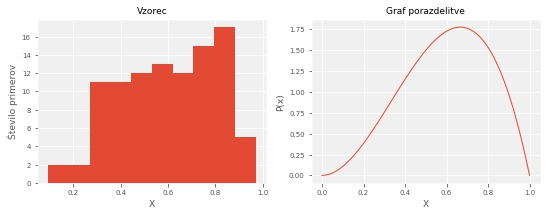

In [8]:
from scipy.stats import beta

# Parametri določajo obliko funkcije
a, b = (3, 2)    # parametra a, b

n = 100                            # velikost vzorca
sample = beta.rvs(a, b, size=n)        # naključen vzorec n primerov spremenljivke

xr = np.linspace(0, 1, 100)               # interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

##### Vprašanje 3-1-3

Spreminjaj parametra $a$ in $b$. Kako se oblika funkcije spreminja?

##### Question 3-1-3

Change the parameters $a$ and $b$. How does the shape of the function change?

[Odgovor](203-1.ipynb#Odgovor-3-1-3)

[Answer](203-1.ipynb#Answer-3-1-3)

### Učenje parametrov iz vzorca
Tudi za učenje parametrov porazelitve Beta uporabimo funkcijo ```fit```.

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo.

### Learning the parameters from the sample
We use the `fit` function also to learn the Beta distribution parameters.

In one picture we compare the distribution with the learned parameters with the correct distribution.

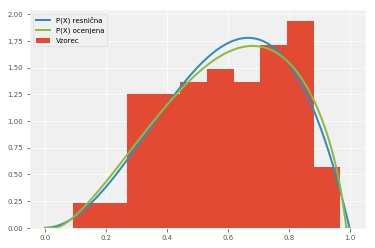

In [9]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend();

##### Vprašanje 3-1-4

Spreminjaj parametra $a$ in $b$ ter velikost vzorca $n$. Kako se spreminja kakovost prileganja?

##### Question 3-1-4

Change the parameters $a$ and $b$ and the size $n$ of the sample. How does the quality of the fitting change?

[Odgovor](203-1.ipynb#Odgovor-3-1-4)

[Answer](203-1.ipynb#Answer-3-1-4)